# 16.8 Getting into Neural Nets

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [ ]:
X_train_full.shape

"When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one
important difference is that every image is represented as a 28 × 28 array rather than
a 1D array of size 784. Moreover, the pixel intensities are represented as integers
(from 0 to 255) rather than floats (from 0.0 to 255.0)"
Why is that exactly? Well, for machine learning (SVM and so on), we do not really care what position and what image we have, since we DO NOT CARE ABOUT PATERNS. But in Deep Nets we have it!

validation ,training sets:

In [ ]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")

### building the Network

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

          

In [ ]:
model.summary()
#note: 235500=784*300 (weights from the input neurons)+300 (bias terms)

In [ ]:
keras.utils.plot_model(model)

In [ ]:
hidden1=model.layers[1]

In [ ]:
hidden1.name

In [ ]:
weights, biases=hidden1.get_weights()

In [ ]:
biases

In [ ]:
y_valid.shape

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", #stochastic gradient descent
             metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

In [ ]:
history.params

In [ ]:
import numpy as np

x= np.linspace(1,30,30)


In [ ]:

fig,ax=plt.subplots(figsize=(15,5))
for i in history.history.keys():
    ax.plot(x,history.history[i],label=i)
ax.legend()

In [ ]:
history=model.fit(X_train,y_train,epochs=10, validation_data=(X_valid,y_valid))

In [ ]:
x=np.linspace(1,10,10)
fig,ax=plt.subplots(figsize=(15,5))
for i in history.history.keys():
    ax.plot(x,history.history[i],label=i)
ax.legend()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
X_new=X_test[:2]

In [ ]:
y_pred=model.predict(X_new)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_test[:3]

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img("hoodie.png","channels_first")
data = img_to_array(img)


In [ ]:
data_3=data[:,:,2]/255.0

In [ ]:
data_1_2=np.stack((data_1, data_2,data_3))

In [ ]:
a=np.array([[[1,2,3],
            [4,5,6],
            [7,8,9]],
           [[10,11,12],
            [13,14,15],
            [16,17,18]]])
#I want from (2,3,3)-> (3,3,2)

In [ ]:
a.shape

In [ ]:
a=a.reshape(3,3,2)
a

In [ ]:
data_1.shape
#data_1.reshape(2,28,28)

In [ ]:
X_new.shape

In [ ]:
data_1_pred=model.predict(data_1_2)

In [ ]:
data_1_pred


In [ ]:
np.argmax(data_1_pred,axis=-1)

In [ ]:
#class_names
plt.imshow(data_1_2[2]*255,cmap="binary")

## Use Tensorboad to visualise it!

In [ ]:
import os
root_logdir=os.path.join(os.curdir,"my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

# 17.8 Regression MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()
X_train_full, X_test, y_train_full, y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full, y_train_full)

In [ ]:
scaler=StandardScaler()

In [ ]:
#use the Scaler to standartize the values!
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
# build the NEt
model=keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])
#1 output layer, because we need just one single value after the regression
model.compile(loss="mean_squared_error",optimizer="sgd")


In [ ]:
#fitting the model
history=model.fit(X_train,y_train, validation_data=(X_valid, y_valid),epochs=20)

In [ ]:
model.save("class.h5")

In [ ]:
#history.history

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(pd.DataFrame(history.history))

In [ ]:
X_new=X_test[:3]

In [ ]:
#y_pred=model.predict(X_new)
model_loaded.predict(X_new)

In [ ]:
#relative error on each value
(y_test[:3] - y_pred.flatten())/y_test[:3] *100

In [ ]:
model.summary()
#basically here we have one inputs layer(not shown), and then first hidden layer with 30 Neurons; and then the output! THAT SI IT!

## Functional API

In [ ]:
# build a model with NOT Sequential Architecture with Functional API

In [ ]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [ ]:
model.summary()

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

In [ ]:
print("y_pred=",y_pred)
print("y_test=",y_test[:3])

NOT! that particulary GREAT

In [ ]:
#######another architercture:

In [ ]:
input_A=keras.layers.Input(shape=[5], name="wide path")
input_B=keras.layers.Input(shape=[6], name="deep input")
hidden1=keras.layers.Dense(30, activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1,name="output")(concat)
model=keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

#new output layer

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [ ]:
y_pred_main

In [ ]:
from tensorflow.keras.models import load_model

model.save("my_keras_model.h5")

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

iris=datasets.load_iris()

In [ ]:
X=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)

In [ ]:
X.shape

In [ ]:
svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc", SGDClassifier(loss="hinge")),
])
svm_clf.fit(X,y)

In [ ]:
svm_clf.predict([[5.5,1.7]])

In [ ]:
from sklearn.svm import SVR

In [ ]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [ ]:
svr=SVR(epsilon=1.5,kernel="linear")
svr.fit(X,y)

In [ ]:
y_predict=svr.predict(X)
plt.scatter(X,y, label="data")
plt.plot(X,y_predict,label="predicted")
plt.plot(X,y_predict+svr.epsilon,label="upper")
plt.plot(X,y_predict-svr.epsilon,label="lower")
#plt.scatter(X[svr.support_],y[svr.support_] )
plt.legend()

In [ ]:
X[svr.support_]

In [ ]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

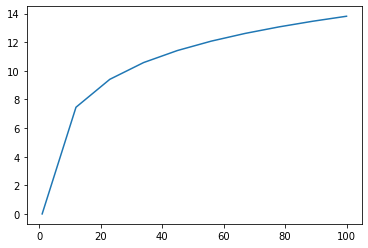

In [21]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(1,100,10)
y=np.log(x)*3
plt.plot(x,y)